In [7]:
#!pip install selenium
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [16]:
import json
from collections import defaultdict
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from selenium.webdriver.common.by import By

In [9]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

PATH = '/chromedriver_mac_arm64/chromedriver'


l=list()
o={}

target_url = "https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=true"

driver=webdriver.Chrome(PATH)

driver.get(target_url)

driver.maximize_window()
time.sleep(2)

resp = driver.page_source

driver.find_element_by_xpath("M13.34 12l5.38-5.38a.95.95 0 00-1.34-1.34L12 10.66 6.62 5.28a.95.95 0 00-1.34 1.34L10.66 12l-5.38 5.38a.95.95 0 001.34 1.34L12 13.34l5.38 5.38a.95.95 0 001.34-1.34z").click()
#driver.close()
driver.find_

/var/folders/4v/4zh9kt9x7wdgh06tc0_s1gh40000gn/T/ipykernel_3132/476534705.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH)


KeyboardInterrupt: 

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=true")

    # Get element with tag name 'div'
element = driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()

driver.maximize_window()

In [ ]:
driver = webdriver.Chrome()
# driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=false")
driver.get("https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm?clickSource=searchBox")
jobs = []
num_jobs = 900
verbose = True
while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(4)

        #Test for the "Sign Up" prompt and get rid of it.
#         try:
#             driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()
#         except ElementClickInterceptedException:
#             pass

#         time.sleep(.1)

        try:
            driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()  #clicking to the X.
        except NoSuchElementException:
            pass

        
        #Going through each job in this page
        job_buttons = driver.find_elements(By.CSS_SELECTOR, '[data-test="jobListing"]')  #jl for Job Listing. These are the buttons we're going to click.
        
              
        for job_button in job_buttons:  
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            
            if len(jobs) >= num_jobs:
                break
                
            try:
                if driver.find_element(By.CSS_SELECTOR, '[alt="Close"]'):
                    time.sleep(3)
                    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
            except NoSuchElementException:
                pass
            
#             job_button.click()
            
            try:
                job_button.click()
            except NoSuchElementException:
                print(job_button.text)

      
            try:
                if driver.find_element(By.CSS_SELECTOR, '[alt="Close"]'):
                    time.sleep(3)
                    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
            except NoSuchElementException:
                pass

            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    if driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]'):
                        company_name = driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]').text
                    else:
                        try:
                            company_name = driver.find_element(By.CSS_SELECTOR, '[class="d-flex justify-content-between"]').text
                        except:
                            NoSuchElementException
                    location = driver.find_element(By.CSS_SELECTOR, '[data-test="location"]').text
                    job_title = driver.find_element(By.CSS_SELECTOR, '[class="css-1vg6q84 e1tk4kwz4"]').text
                    job_description = driver.find_element(By.CSS_SELECTOR, '[class="jobDescriptionContent desc"]').text
                    # salary_estimate = driver.find_element(By.CSS_SELECTOR, '[class="css-1xe2xww e1wijj242"]').text
                    collected_successfully = True
#                     if len(job_title)<1:
#                         time.sleep(5)
#                         job_title = driver.find_element(By.CSS_SELECTOR, '[data-test="jobTitle"]').text
                except:
                    time.sleep(5)
                    
                    
            # class="d-flex justify-content-between"

            try:
#                 salary_element = WebDriverWait(driver, 10).until(
#                                     EC.presence_of_element_located((By.CSS_SELECTOR, "[class='css-1bluz6i e2u4hf13']")))
                salary_estimate = driver.find_element(By.CSS_SELECTOR, '[class="css-1bluz6i e2u4hf13"]').get_attribute("textContent")
#                 salary_estimate = salary_element.text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element(By.CSS_SELECTOR, '[data-test="detailRating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            
            #try:
            overview_name = driver.find_elements(By.CSS_SELECTOR, '[class="css-1taruhi e1pvx6aw1"]')
            overview_name_list = [element.text for element in overview_name]
            overview = driver.find_elements(By.CSS_SELECTOR, '[class="css-i9gxme e1pvx6aw2"]')
            overview_list = [element.text for element in overview]
#             for name, value in zip(overview_name_list, overview_list):
            if "Size" in overview_name_list:
                size = overview_list[overview_name_list.index("Size")]
            else:
                size = -1

            if "Founded" in overview_name_list:
                founded = overview_list[overview_name_list.index("Founded")]
            else:
                founded = -1

            if "Type" in overview_name_list:
                type_of_ownership = overview_list[overview_name_list.index("Type")]
            else:
                type_of_ownership = -1

            if "Industry" in overview_name_list:
                industry = overview_list[overview_name_list.index("Industry")]
            else:
                industry = -1

            if "Sector" in overview_name_list:
                sector = overview_list[overview_name_list.index("Sector")]
            else:
                sector = -1

            if "Revenue" in overview_name_list:
                revenue = overview_list[overview_name_list.index("Revenue")]
            else:
                revenue = -1

#                     founded = overview[1].text
#                     type_of_ownership = overview[2].text
#                     industry = overview[3].text
#                     sector = overview[4].text
#                     revenue = overview[5].text
#                 else:# NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
#                     headquarters = -1
#                     size = -1
#                     founded = -1
#                     type_of_ownership = -1
#                     industry = -1
#                     sector = -1
#                     revenue = -1

                
            if verbose:
                # print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                # print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            #"Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element(By.CSS_SELECTOR, '[aria-label="Next"]').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

In [ ]:
first_scrape = jobs
first_scrape

In [10]:
import pandas as pd
stored_dataframe = pd.read_csv('glassdoor_ds_job_salary.csv')

In [11]:
newly_scraped = pd.DataFrame(first_scrape)

NameError: name 'first_scrape' is not defined

In [ ]:

new_df = pd.concat([stored_dataframe, newly_scraped], axis=0)


In [ ]:
new_df.drop_duplicates()

In [ ]:
updated_scraped = new_df.drop_duplicates()

In [ ]:
updated_scraped.to_csv('glassdoor_ds_job_salary.csv', index=False)

In [ ]:
stored_dataframe

In [ ]:
second_scrape = jobs
second_scrape

In [ ]:
combined_first_second = first_scrape + second_scrape + third_scrape + success_list
len(combined_first_second)

In [ ]:
third_scrape = jobs
len(third_scrape)

In [ ]:
import json
unique_values = set(json.dumps(d) for d in success_list)

print(len(unique_values))
unique_values

In [ ]:
success_list = jobs
len(success_list)
success_set = set(json.dumps(d) for d in success_list)
len(success_set)

In [ ]:
from collections import defaultdict
def frequencies(lst):
    freq = defaultdict(int)
    for val in lst:
        freq[val] += 1
    return dict(freq)



In [ ]:
list = [1, 2, 3]
frequencies(list)

In [ ]:
success_lst = [json.dumps(d) for d in success_list]

In [ ]:
successs_dict = frequencies(success_lst)

In [ ]:
type(successs_dict)

In [ ]:
for key, value in successs_dict.items():
    print(value)

In [ ]:
successs_dict

In [ ]:
success_lst = [json.dumps(d) for d in success_list]
print(len(success_lst)
print(frequencies(success_lst))

In [ ]:
first_scrape.extend(second_scrape)

In [ ]:
response = requests.get(target_url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")
soup = BeautifulSoup(response.content, 'html.parser')
allJobsContainer = soup.find("ul")

#allJobs = allJobsContainer.find_all("li")

In [ ]:
response.status_code

In [ ]:
allJobsContainer

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=false")

    # Get element with tag name 'div'
element = driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()
job_buttons = driver.find_elements(By.CSS_SELECTOR, '[data-test="jobListing"]')  #jl for Job Listing. These are the buttons we're going to click.
for job_button in job_buttons: 
    try:
        driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
    except NoSuchElementException:
        pass
    job_button.click()
    try:
        driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
    except NoSuchElementException:
        pass

            
# collected_successfully = False

# while not collected_successfully:
#     try:
#         company_name = driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]').text
#         location = driver.find_element(By.CSS_SELECTOR, '[data-test="location"]').text
#         job_title = driver.find_element(By.CSS_SELECTOR, '[data-test="job-link"]').text
#         job_description = driver.find_element(By.CSS_SELECTOR, '[class="jobDescriptionContent desc"]').text
#         collected_successfully = True
#     except:
#         time.sleep(5)
                    
#     try:
#         salary_estimate = driver.find_element(By.CSS_SELECTOR, '[data-test="detailSalary"]').text
#     except NoSuchElementException:
#         salary_estimate = -1 #You need to set a "not found value. It's important."

#     try:
#         rating = driver.find_element(By.CSS_SELECTOR, '[data-test="detailRating"]').text
#     except NoSuchElementException:
#         rating = -1 #You need to set a "not found value. It's important."
        
# overview = driver.find_elements(By.CSS_SELECTOR, '[class="css-i9gxme e1pvx6aw2"]')
# #for each in overview:
# size = overview[0].text
# founded = overview[1].text
# type_of_ownership = overview[2].text
# industry = overview[3].text
# sector = overview[4].text
# revenue = overview[5].text
    #print(each.text)
driver.maximize_window()


In [ ]:
company_name

In [ ]:
location

In [ ]:
job_title

In [ ]:
job_description

In [ ]:
salary_estimate

In [ ]:
rating

In [ ]:
size

In [ ]:
founded

In [ ]:
type_of_ownership

In [ ]:
industry

In [ ]:
sector

In [ ]:
revenue

In [ ]:
job_buttons

In [ ]:
type(job_title)

In [ ]:
import pandas as pd
df = pd.DataFrame(combined_first_second)
df

In [ ]:
df_no_dup = df.drop_duplicates()

In [ ]:
df_no_dup.to_csv('glassdoor_ds_job_salary.csv', index=False)

In [ ]:
newly_scraped

After webscraping the data, we put it into a csv file.


<h1>DATA CLEANING SECTION</h1>

In [96]:
import pandas as pd

In [97]:
df = pd.read_csv('glassdoor_ds_job_salary.csv')

In [98]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist V,"$111,362 /yr (est.)","Posting End Date:\nApril 09, 2023\nEmployee Ty...",4.1,Enbridge\n4.1,"Houston, TX",10000+ Employees,1949,Company - Public,Energy & Utilities,"Energy, Mining & Utilities",$10+ billion (USD)
1,Data Scientist,-1,Data Scientist\nJob Category: Science\nTime Ty...,4.0,CACI\n4.0,"Charlottesville, VA",10000+ Employees,1962,Company - Public,Aerospace & Defense,Aerospace & Defense,$1 to $5 billion (USD)
2,Data Science/Analysis Research Librarian,-1,Hamilton College invites applications for the ...,4.6,Hamilton College\n4.6,"Clinton, NY",501 to 1000 Employees,1812,College / University,Colleges & Universities,Education,$25 to $100 million (USD)
3,Senior Systems Engineer - Systems Modeling & C...,"$125,000 /yr (est.)",You will have an opportunity to directly impac...,4.1,Cenergy International Services\n4.1,"Boston, MA",10000+ Employees,1907,Company - Public,Energy & Utilities,"Energy, Mining & Utilities",$10+ billion (USD)
4,Senior Data Scientist - TS Clearance Required,"$131,400 /yr (est.)",Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,"Sterling, VA",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...
576,Applied Machine Learning Engineer,"$128,357 /yr (est.)","At Snorkel AI, we're redefining how people and...",4.6,Snorkel AI\n4.6,"Redwood City, CA",51 to 200 Employees,2019,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable
577,Data Scientist,"$124,155 /yr (est.)","Data Scientist\nBurlingame, CA or Remote\n\nWh...",4.4,Focal Systems\n4.4,"Burlingame, CA",1 to 50 Employees,2015,Company - Private,Computer Hardware Development,Information Technology,$1 to $5 million (USD)
578,Data Science Advisor,"$127,100 /yr (est.)",Summary\n\nUsing your knowledge of ML / AI you...,3.8,Cigna\n3.8,"Bloomfield, CT",10000+ Employees,1865,Company - Public,Health Care Services & Hospitals,Healthcare,$10+ billion (USD)
579,"Senior Director, Data Science- Card Fraud",-1,"Center 1 (19052), United States of America, Mc...",4.2,Capital One\n4.2,"Richmond, VA",10000+ Employees,1994,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD)


In [99]:
#we first check for duplicates
print(f"There are {df.duplicated().sum()} duplicates")

# remove duplicates
df.drop_duplicates(inplace=True)

There are 23 duplicates


In [100]:
# check for missing values
df.isna().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location             14
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
dtype: int64

In [101]:
#remove unnecessary columns
df.drop(['Founded', 'Type of ownership'], axis=1, inplace=True)

We are now going to handle the most important part of hour dataset: salary estimate

In [102]:
#remove all rows that have a missing estimated salary. We need labeled examples in order to build our model!

# We first Count the number of rows with -1 as salary estimate (which means it is missing)
count = df[df['Salary Estimate'] == '-1'].shape[0]
print(f'There are {count} rows with a missing salary estimate')

#remove those rows
df = df[df['Salary Estimate'] != '-1']

There are 94 rows with a missing salary estimate


In [103]:
import re

#Let's check if all the salaries have the same format. For example: $131,400 /yr (est.)


# Define regular expression pattern to check format
pattern = r'\$\d{1,3}(,\d{3})*\s?\/yr\s?\(est.\)'

# Check if all values in the Salary Estimate column have the expected format
matches = df['Salary Estimate'].apply(lambda x: bool(re.match(pattern, x)))

not_matching = df[~matches]
print(f'Number of Values in the Salary Estimate column have do not have the expected format: {len(not_matching)}')
not_matching

Number of Values in the Salary Estimate column have do not have the expected format: 24


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
14,Data Mining Center Journeyman Electrician,$33.00 /hr (est.),Bitcoin Mining Center Journeyman Electrician:\...,-1.0,Pennum Industries,"Greenville, SC",-1,-1,-1,-1
22,Sr Data Analyst-Clinical Evidence Strategy & I...,$35.50 /hr (est.),"Description:\nThe Senior Data Analyst, Clinica...",4.0,"Sunrise Systems, Inc\n4.0","Miami, FL",501 to 1000 Employees,Information Technology Support Services,Information Technology,$25 to $100 million (USD)
36,Contract Senior Statistical Programmer (Remote),$100.00 /hr (est.),We are helping a small pharmaceutical company ...,-1.0,"Sysdata Consulting, Inc",Remote,-1,-1,-1,-1
81,AI/ML Autonomous Vehicle Software Video Analyst,$27.00 /hr (est.),Kett Engineering is seeking AI / ML Autonomous...,3.1,Kett Engineering Corporation\n3.1,"Santa Clara, CA",501 to 1000 Employees,Accounting & Tax,Financial Services,$25 to $100 million (USD)
89,Statistician,$36.00 /hr (est.),Company Name: Sciome LLC\nAddress: 2 Davis Dri...,-1.0,Sciome LLC,"Research Triangle Park, NC",1 to 50 Employees,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Unknown / Non-Applicable
98,Data Scientist_Computer Vision,$85.00 /hr (est.),9+ years\nData Scientist -- Computer Vision\n1...,-1.0,ABN Tech Corp,"Santa Clara, CA",-1,-1,-1,-1
134,DATA SCIENTIST,"$7,917 /mo (est.)","Benefits:\nAs a UW employee, you will enjoy ge...",4.2,University of Washington\n4.2,"Seattle, WA",10000+ Employees,Colleges & Universities,Education,$1 to $5 billion (USD)
136,Senior Statistician,$115.00 /hr (est.),Key Responsibilities:\nAnalyze numerical data ...,-1.0,ThirdEye Data Inc.,California,-1,-1,-1,-1
146,Data Scientist,$70.00 /hr (est.),TECHNICAL SKILLS\nMust Have\n4-5 years related...,3.7,Devcare Solutions\n3.7,"Columbus, OH",51 to 200 Employees,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
240,Senior Statistical Programmer,$89.00 /hr (est.),Senior Statistical Programmer Start: 05/01/202...,4.5,Joule\n4.5,"Ridgefield, CT",201 to 500 Employees,HR Consulting,Human Resources & Staffing,$100 to $500 million (USD)


In [104]:
# We realize that some salaries are expressed at a hourly rate, instead of a yearly rate.


# Identify rows with hourly salary values
hourly_mask = df['Salary Estimate'].str.contains('/hr')

# Convert hourly salary values to yearly salary values
df.loc[hourly_mask, 'Salary Estimate'] = df.loc[hourly_mask, 'Salary Estimate'].apply(lambda x: str(float(x[1:x.index('/')].replace(',', '')) * 2080) + ' /yr (est.)')


# Remove any non-numeric characters and convert to numeric
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))

df['Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])

#We now have in our salary estimate column yearly salaries expressed as integers


/var/folders/4v/4zh9kt9x7wdgh06tc0_s1gh40000gn/T/ipykernel_28240/1807838738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))
/var/folders/4v/4zh9kt9x7wdgh06tc0_s1gh40000gn/T/ipykernel_28240/1807838738.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])


In [105]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
0,Data Scientist V,111362,"Posting End Date:\nApril 09, 2023\nEmployee Ty...",4.1,Enbridge\n4.1,"Houston, TX",10000+ Employees,Energy & Utilities,"Energy, Mining & Utilities",$10+ billion (USD)
3,Senior Systems Engineer - Systems Modeling & C...,125000,You will have an opportunity to directly impac...,4.1,Cenergy International Services\n4.1,"Boston, MA",10000+ Employees,Energy & Utilities,"Energy, Mining & Utilities",$10+ billion (USD)
4,Senior Data Scientist - TS Clearance Required,131400,Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,"Sterling, VA",Unknown,-1,-1,Unknown / Non-Applicable
5,"Senior Utility Analyst, Principal Utility Anal...",127158,We are currently accepting applications for th...,4.1,Snohomish County PUD No.1\n4.1,"Everett, WA",501 to 1000 Employees,Energy & Utilities,"Energy, Mining & Utilities",$500 million to $1 billion (USD)
6,Data Science Specialist - Office of Education ...,72784,AIDT and the Alabama Department of Commerce in...,4.3,AIDT\n4.3,"Montgomery, AL",51 to 200 Employees,Education & Training Services,Education,$25 to $100 million (USD)
...,...,...,...,...,...,...,...,...,...,...
572,Data Science Co-op,106510,"Abiomed, part of Johnson & Johnson MedTech, is...",3.6,Abiomed\n3.6,"Danvers, MA",1001 to 5000 Employees,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$100 to $500 million (USD)
574,Data Scientist - RWD,150000,Job Summary:\nWe are seeking an experienced Da...,-1.0,Norstella,Remote,-1,-1,-1,-1
575,Sr Data Analyst-Clinical Evidence Strategy & I...,738400,"Description:\nThe Senior Data Analyst, Clinica...",4.0,"Sunrise Systems, Inc\n4.0","Miami, FL",501 to 1000 Employees,Information Technology Support Services,Information Technology,$25 to $100 million (USD)
576,Applied Machine Learning Engineer,128357,"At Snorkel AI, we're redefining how people and...",4.6,Snorkel AI\n4.6,"Redwood City, CA",51 to 200 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable


In [106]:
#cleaning a little bit the job description
df['Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))
df

/var/folders/4v/4zh9kt9x7wdgh06tc0_s1gh40000gn/T/ipykernel_28240/2440021809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
0,Data Scientist V,111362,"Posting End Date: April 09, 2023 Employee Type...",4.1,Enbridge\n4.1,"Houston, TX",10000+ Employees,Energy & Utilities,"Energy, Mining & Utilities",$10+ billion (USD)
3,Senior Systems Engineer - Systems Modeling & C...,125000,You will have an opportunity to directly impac...,4.1,Cenergy International Services\n4.1,"Boston, MA",10000+ Employees,Energy & Utilities,"Energy, Mining & Utilities",$10+ billion (USD)
4,Senior Data Scientist - TS Clearance Required,131400,Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,"Sterling, VA",Unknown,-1,-1,Unknown / Non-Applicable
5,"Senior Utility Analyst, Principal Utility Anal...",127158,We are currently accepting applications for th...,4.1,Snohomish County PUD No.1\n4.1,"Everett, WA",501 to 1000 Employees,Energy & Utilities,"Energy, Mining & Utilities",$500 million to $1 billion (USD)
6,Data Science Specialist - Office of Education ...,72784,AIDT and the Alabama Department of Commerce in...,4.3,AIDT\n4.3,"Montgomery, AL",51 to 200 Employees,Education & Training Services,Education,$25 to $100 million (USD)
...,...,...,...,...,...,...,...,...,...,...
572,Data Science Co-op,106510,"Abiomed, part of Johnson & Johnson MedTech, is...",3.6,Abiomed\n3.6,"Danvers, MA",1001 to 5000 Employees,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$100 to $500 million (USD)
574,Data Scientist - RWD,150000,Job Summary: We are seeking an experienced Dat...,-1.0,Norstella,Remote,-1,-1,-1,-1
575,Sr Data Analyst-Clinical Evidence Strategy & I...,738400,"Description: The Senior Data Analyst, Clinical...",4.0,"Sunrise Systems, Inc\n4.0","Miami, FL",501 to 1000 Employees,Information Technology Support Services,Information Technology,$25 to $100 million (USD)
576,Applied Machine Learning Engineer,128357,"At Snorkel AI, we're redefining how people and...",4.6,Snorkel AI\n4.6,"Redwood City, CA",51 to 200 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable


In [107]:
print(df.dtypes)

Job Title           object
Salary Estimate      int64
Job Description     object
Rating             float64
Company Name        object
Location            object
Size                object
Industry            object
Sector              object
Revenue             object
dtype: object


In [108]:
#check null values in the whole database
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 577
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        464 non-null    object 
 1   Salary Estimate  464 non-null    int64  
 2   Job Description  464 non-null    object 
 3   Rating           464 non-null    float64
 4   Company Name     464 non-null    object 
 5   Location         451 non-null    object 
 6   Size             464 non-null    object 
 7   Industry         464 non-null    object 
 8   Sector           464 non-null    object 
 9   Revenue          464 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.9+ KB


In [109]:
rows_with_null = df[df.isnull().any(axis=1)]
print(f"Len:{len(rows_with_null)}")
rows_with_null

Len:13


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
138,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary: Walgreens, one of the nation's l...",3.1,WALGREENS\n3.1,NaN,10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
201,"PhD Director, Data Science R&D (Decision Scien...",105882,"Job Description In this role, you will assume...",3.9,Epsilon\n3.9,NaN,5001 to 10000 Employees,Advertising & Public Relations,Media & Communication,$1 to $5 billion (USD)
236,"Sr Manager, Data Science",120353,"At HCSC, we consider our employees the corners...",4.0,HCSC\n4.0,NaN,10000+ Employees,Insurance Carriers,Insurance,Unknown / Non-Applicable
276,Data Scientist - Supply Planning,100638,Beam Suntory is Crafting the Spirits that Stir...,3.9,Beam Inc.\n3.9,NaN,5001 to 10000 Employees,Food & Beverage Manufacturing,Manufacturing,$1 to $5 billion (USD)
318,Senior Data Scientist - TS Clearance Required,131400,Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,NaN,Unknown,-1,-1,Unknown / Non-Applicable
319,"Data Scientist, Ecosystem",160665,About Pinterest: Millions of people across the...,4.0,Pinterest\n4.0,NaN,1001 to 5000 Employees,Internet & Web Services,Information Technology,$100 to $500 million (USD)
323,Data Scientist,1508000,Position: Data Scientist (Strong PowerBI knowl...,5.0,Avis Technologies\n5.0,NaN,Unknown,-1,-1,Unknown / Non-Applicable
332,Machine Learning Engineer,117711,Job Information Number of Positions 1 Industry...,4.0,LeewayHertz\n4.0,NaN,51 to 200 Employees,Computer Hardware Development,Information Technology,Unknown / Non-Applicable
369,Data Scientist,117500,About the Role: We are looking for a highly an...,4.2,Nanit\n4.2,NaN,1 to 50 Employees,Consumer Electronics & Appliances Stores,Retail & Wholesale,Unknown / Non-Applicable
458,Applied Machine Learning Scientist - Data Tech...,205000,Who we are: The Bloomberg Engineering Data Tec...,4.1,Bloomberg\n4.1,NaN,10000+ Employees,Computer Hardware Development,Information Technology,Unknown / Non-Applicable


Check each column and handle strange values (if exists)

In [110]:
import numpy as np
df['Location'].unique()

array(['Houston, TX', 'Boston, MA', 'Sterling, VA', 'Everett, WA',
       'Montgomery, AL', 'King George, VA', 'Remote', 'Millersville, MD',
       'Moorestown, NJ', 'Andover, MA', 'Greenville, SC', 'Norfolk, VA',
       'Chicago, IL', 'Washington, DC', 'Carlsbad, CA', 'Miami, FL',
       'Frisco, TX', 'Philadelphia, PA', 'Tampa, FL', 'Chantilly, VA',
       'Dallas, TX', 'Raleigh, NC', 'Deerfield, IL', 'Palo Alto, CA',
       'Estero, FL', 'Basking Ridge, NJ', 'Santa Clara, CA',
       'Hauppauge, NY', 'San Jose, CA', 'Fayetteville, AR', 'York, NY',
       'Atlanta, GA', 'Danvers, MA', 'Durham, NC', 'Seattle, WA',
       'New York, NY', 'Reno, NV', 'Manhattan', 'Coppell, TX',
       'Fond du Lac, WI', 'Eagan, MN', 'Phoenix, AZ', 'San Francisco, CA',
       'Research Triangle Park, NC', 'Richardson, TX', 'Clark, NJ',
       'Somerville, MA', 'Newport News, VA', 'Waltham, MA',
       'Arlington, VA', 'Illinois', 'Wellesley Hills, MA',
       'Beaverton, OR', 'Cleveland, OH', 'Lewisville

In [111]:
df[df['Location'].apply(lambda x: isinstance(x, float))]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
138,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary: Walgreens, one of the nation's l...",3.1,WALGREENS\n3.1,NaN,10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
201,"PhD Director, Data Science R&D (Decision Scien...",105882,"Job Description In this role, you will assume...",3.9,Epsilon\n3.9,NaN,5001 to 10000 Employees,Advertising & Public Relations,Media & Communication,$1 to $5 billion (USD)
236,"Sr Manager, Data Science",120353,"At HCSC, we consider our employees the corners...",4.0,HCSC\n4.0,NaN,10000+ Employees,Insurance Carriers,Insurance,Unknown / Non-Applicable
276,Data Scientist - Supply Planning,100638,Beam Suntory is Crafting the Spirits that Stir...,3.9,Beam Inc.\n3.9,NaN,5001 to 10000 Employees,Food & Beverage Manufacturing,Manufacturing,$1 to $5 billion (USD)
318,Senior Data Scientist - TS Clearance Required,131400,Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,NaN,Unknown,-1,-1,Unknown / Non-Applicable
319,"Data Scientist, Ecosystem",160665,About Pinterest: Millions of people across the...,4.0,Pinterest\n4.0,NaN,1001 to 5000 Employees,Internet & Web Services,Information Technology,$100 to $500 million (USD)
323,Data Scientist,1508000,Position: Data Scientist (Strong PowerBI knowl...,5.0,Avis Technologies\n5.0,NaN,Unknown,-1,-1,Unknown / Non-Applicable
332,Machine Learning Engineer,117711,Job Information Number of Positions 1 Industry...,4.0,LeewayHertz\n4.0,NaN,51 to 200 Employees,Computer Hardware Development,Information Technology,Unknown / Non-Applicable
369,Data Scientist,117500,About the Role: We are looking for a highly an...,4.2,Nanit\n4.2,NaN,1 to 50 Employees,Consumer Electronics & Appliances Stores,Retail & Wholesale,Unknown / Non-Applicable
458,Applied Machine Learning Scientist - Data Tech...,205000,Who we are: The Bloomberg Engineering Data Tec...,4.1,Bloomberg\n4.1,NaN,10000+ Employees,Computer Hardware Development,Information Technology,Unknown / Non-Applicable


In [112]:
#adding a column for the state

df['Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)
df['Job State'].value_counts()

/var/folders/4v/4zh9kt9x7wdgh06tc0_s1gh40000gn/T/ipykernel_28240/4076301459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)


CA    54
VA    46
te    40
MA    37
TX    32
IL    30
NY    26
NJ    18
MD    16
CT    16
DC    15
NC    15
FL    14
WA    12
GA     9
CO     7
OH     7
WI     7
PA     5
AR     4
AL     4
UT     3
ia     3
AZ     3
SC     3
OR     2
on     2
es     2
ME     2
MO     2
MN     2
RI     1
NV     1
HI     1
NE     1
is     1
IA     1
TN     1
ts     1
LA     1
as     1
an     1
IN     1
DE     1
Name: Job State, dtype: int64

In [113]:
df.loc[df['Job State'] == 'ia', 'Job State'] = 'CA' #changing California to CA
df.loc[df['Job State'] == 'ts', 'Job State'] = 'MA' #changing Massacchussets to MA
df.loc[df['Job State'] == 'is', 'Job State'] = 'IL' #changing Illinois to IL
df.loc[df['Job State'] == 'an', 'Job State'] = 'NY'  #changing Manatthan to NY
df.loc[df['Job State'] == 'te', 'Job State'] = 'Remote'
df.loc[df['Job State'] == 'as', 'Job State'] = 'TX'
df.loc[df['Job State'] == 'es', 'Job State'] = np.nan #United States
df.loc[df['Job State'] == 'on', 'Job State'] = 'OR' #Oregon
df['Job State'].value_counts()

CA        57
VA        46
Remote    40
MA        38
TX        33
IL        31
NY        27
NJ        18
CT        16
MD        16
NC        15
DC        15
FL        14
WA        12
GA         9
CO         7
OH         7
WI         7
PA         5
OR         4
AR         4
AL         4
AZ         3
UT         3
SC         3
MN         2
ME         2
MO         2
IA         1
IN         1
LA         1
TN         1
NV         1
HI         1
RI         1
NE         1
DE         1
Name: Job State, dtype: int64

<p style = color:red>NB: we have to understad how to handle this rating</p>

In [114]:
df['Rating'].unique() #-1 as strange value
df.loc[df['Rating'] == -1, 'Rating'] = np.nan
df['Rating'].info()

<class 'pandas.core.series.Series'>
Int64Index: 464 entries, 0 to 577
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
402 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [115]:
df['Company Name'].unique()


array(['Enbridge\n4.1', 'Cenergy International Services\n4.1',
       'Eighty20 Collective', 'Snohomish County PUD No.1\n4.1',
       'AIDT\n4.3', 'Vectrus\n3.9', 'RightFit Talent Brokers, LLC',
       'Signal Systems Corporation', 'Lockheed Martin\n4.1',
       'Draeger Medical Systems, Inc.\n3.8', 'Pennum Industries',
       'Bluemont Technology & Research, Inc.', 'WALGREENS\n3.1',
       'innoVet Health, LLC', 'Inner Balance Technology Services',
       'n-Lorem Foundation', 'Sunrise Systems, Inc\n4.0', 'Clinvia LLC',
       'Vanguard\n3.7', 'Quiet Professionals LLC\n4.7',
       'Millennial Software', 'Patterson-UTI\n3.7', 'Topaz Labs\n3.4',
       'Etainement', 'Sysdata Consulting, Inc', 'Silver Edge',
       'InfiNetix, Inc.', 'EarnIn\n4.2',
       'Scottish Rite for Children\n3.9',
       'WhirlWind Technologies, LLC\n4.8', 'Hertz\n3.2',
       "Physician's Weekly", 'Chabez Tech',
       'Broadway National Group\n3.9', 'Kyla\n4.3', 'Slim Chickens\n3.7',
       'Sitewise Analytic

In [116]:
#clening company name
df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)
df['Company Name'].unique()


/var/folders/4v/4zh9kt9x7wdgh06tc0_s1gh40000gn/T/ipykernel_28240/2181793545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)


array(['Enbridge', 'Cenergy International Services',
       'Eighty20 Collective', 'Snohomish County PUD No.1', 'AIDT',
       'Vectrus', 'RightFit Talent Brokers, LLC',
       'Signal Systems Corporation', 'Lockheed Martin',
       'Draeger Medical Systems, Inc.', 'Pennum Industries',
       'Bluemont Technology & Research, Inc.', 'WALGREENS',
       'innoVet Health, LLC', 'Inner Balance Technology Services',
       'n-Lorem Foundation', 'Sunrise Systems, Inc', 'Clinvia LLC',
       'Vanguard', 'Quiet Professionals LLC', 'Millennial Software',
       'Patterson-UTI', 'Topaz Labs', 'Etainement',
       'Sysdata Consulting, Inc', 'Silver Edge', 'InfiNetix, Inc.',
       'EarnIn', 'Scottish Rite for Children',
       'WhirlWind Technologies, LLC', 'Hertz', "Physician's Weekly",
       'Chabez Tech', 'Broadway National Group', 'Kyla', 'Slim Chickens',
       'Sitewise Analytics', 'Synchron, LLC', 'Sony Electronics',
       'managementsolutions', 'Unum', 'Abiomed',
       'Talentech Consul

In [117]:
#cleaning some size data
df.loc[df['Size'] == '-1', 'Size'] = np.nan
df.loc[df['Size'] == 'Unknown', 'Size'] = np.nan
df['Size'].info()

<class 'pandas.core.series.Series'>
Int64Index: 464 entries, 0 to 577
Series name: Size
Non-Null Count  Dtype 
--------------  ----- 
404 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [118]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            146
$10+ billion (USD)                   89
$1 to $5 billion (USD)               45
$100 to $500 million (USD)           42
-1                                   40
$25 to $100 million (USD)            23
$5 to $25 million (USD)              23
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               15
$500 million to $1 billion (USD)     11
Less than $1 million (USD)           10
Name: Revenue, dtype: int64

In [119]:
#reformatting and cleaning revues (million $)
df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = '0 - 1'
df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = '1 - 5'
df.loc[df['Revenue'] == '$5 to $25 million (USD)', 'Revenue'] = '5 - 25'
df.loc[df['Revenue'] == '$25 to $100 million (USD)', 'Revenue'] = '25 - 100'
df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = '100 - 500'
df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = '500 - 1000'
df.loc[df['Revenue'] == '$1 to $5 billion (USD)', 'Revenue'] = '1000 - 5000'
df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = '5000 - 10000'
df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = '10000+'
df.loc[df['Revenue'] == '-1', 'Revenue'] = np.nan
df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = np.nan
df['Revenue'].info()

<class 'pandas.core.series.Series'>
Int64Index: 464 entries, 0 to 577
Series name: Revenue
Non-Null Count  Dtype 
--------------  ----- 
278 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [120]:
#cleaning Industry and Sector
df['Industry'].value_counts()
df.loc[df['Industry'] == '-1', 'Industry'] = np.nan
#df['Industry'].info()

df['Sector'].value_counts()
df.loc[df['Sector'] == '-1', 'Sector'] = np.nan
#df['Sector'].info()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 577
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        464 non-null    object 
 1   Salary Estimate  464 non-null    int64  
 2   Job Description  464 non-null    object 
 3   Rating           402 non-null    float64
 4   Company Name     464 non-null    object 
 5   Location         451 non-null    object 
 6   Size             404 non-null    object 
 7   Industry         381 non-null    object 
 8   Sector           381 non-null    object 
 9   Revenue          278 non-null    object 
 10  Job State        449 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 43.5+ KB


In [4]:
import pandas as pd

In [4]:
#defining a function to understand which kind of title is the job
def title_simplifier(title):
    title_lower = title.lower()
    if 'data scientist' in title_lower:
        return 'data scientist'
    elif 'data engineer' in title_lower:
        return 'data engineer'
    elif 'analyst' in title_lower:
        return 'analyst'
    elif 'machine learning' in title_lower:
        return 'mle'
    elif 'manager' in title_lower:
        return 'manager'
    elif 'director' in title_lower:
        return 'director'
    elif 'research scientist' in title_lower:
        return 'research scientist'
    elif 'data analyst' in title_lower:
        return 'data analyst'
    elif 'business analyst' in title_lower:
        return 'business analyst'
    elif 'statistician' in title_lower:
        return 'statistician'
    elif 'data architect' in title_lower:
        return 'data architect'
    elif 'data modeler' in title_lower:
        return 'data modeler'
    elif 'database administrator' in title_lower:
        return 'database administrator'
    else:
        return None

    


In [6]:
#applying it to the database
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)
df['Job Simplified'].value_counts() 

NameError: name 'df' is not defined

In [5]:
#defining a function to understand which kind of title is the job
def seniority(title):
    title_lower = title.lower()
    if 'sr' in title_lower or 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'senior'
    elif 'jr' in title_lower or 'jr.' in title_lower or 'entry' in title_lower or 'junior' in title_lower:
        return 'jr'
    elif 'executive' in title_lower or 'vp' in title_lower or 'director' in title_lower:
        return 'executive'
    elif 'manager' in title_lower or 'supervisor' in title_lower:
        return 'manager'
    elif 'associate' in title_lower:
        return 'associate'
    else:
        return None

In [133]:
#applying it to the database
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts() 

/var/folders/4v/4zh9kt9x7wdgh06tc0_s1gh40000gn/T/ipykernel_28240/3775701784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seniority'] = df['Job Title'].apply(seniority)


senior       136
executive     13
jr            12
associate     10
manager        9
Name: Seniority, dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 577
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        464 non-null    object 
 1   Salary Estimate  464 non-null    int64  
 2   Job Description  464 non-null    object 
 3   Rating           402 non-null    float64
 4   Company Name     464 non-null    object 
 5   Location         451 non-null    object 
 6   Size             404 non-null    object 
 7   Industry         381 non-null    object 
 8   Sector           381 non-null    object 
 9   Revenue          278 non-null    object 
 10  Job State        449 non-null    object 
 11  Job Simplified   392 non-null    object 
 12  Seniority        180 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 50.8+ KB


<h2>Data Cleaning Functions needed</h2>

In [6]:
#defining a function to understand which kind of title is the job
def title_simplifier(title):
    title_lower = title.lower()
    if 'data scientist' in title_lower:
        return 'data scientist'
    elif 'data engineer' in title_lower:
        return 'data engineer'
    elif 'analyst' in title_lower:
        return 'analyst'
    elif 'machine learning' in title_lower:
        return 'mle'
    elif 'manager' in title_lower:
        return 'manager'
    elif 'director' in title_lower:
        return 'director'
    elif 'research scientist' in title_lower:
        return 'research scientist'
    elif 'data analyst' in title_lower:
        return 'data analyst'
    elif 'business analyst' in title_lower:
        return 'business analyst'
    elif 'statistician' in title_lower:
        return 'statistician'
    elif 'data architect' in title_lower:
        return 'data architect'
    elif 'data modeler' in title_lower:
        return 'data modeler'
    elif 'database administrator' in title_lower:
        return 'database administrator'
    else:
        return None

In [7]:
#defining a function to understand which kind of title is the job
def seniority(title):
    title_lower = title.lower()
    if 'sr' in title_lower or 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'senior'
    elif 'jr' in title_lower or 'jr.' in title_lower or 'entry' in title_lower or 'junior' in title_lower:
        return 'jr'
    elif 'executive' in title_lower or 'vp' in title_lower or 'director' in title_lower:
        return 'executive'
    elif 'manager' in title_lower or 'supervisor' in title_lower:
        return 'manager'
    elif 'associate' in title_lower:
        return 'associate'
    else:
        return None

In [8]:
# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None
import re
def clean_data(df):
    
    #remove duplicates
    #print(f"There are {df.duplicated().sum()} duplicates")
    df.drop_duplicates(inplace=True)
    
    #remove unnecessary columns
    df.drop(['Founded', 'Type of ownership'], axis=1, inplace=True)
    
    #remove all rows that have a missing estimated salary. We need labeled examples in order to build our model!

    # We first Count the number of rows with -1 as salary estimate (which means it is missing)
    #count = df[df['Salary Estimate'] == '-1'].shape[0]
    #print(f'There are {count} rows with a missing salary estimate')

    #remove those rows
    df = df[df['Salary Estimate'] != '-1']
    
    # Identify rows with hourly salary values
    hourly_mask = df['Salary Estimate'].str.contains('/hr')

    # Convert hourly salary values to yearly salary values
    df.loc[hourly_mask, 'Salary Estimate'] = df.loc[hourly_mask, 'Salary Estimate'].apply(lambda x: str(float(x[1:x.index('/')].replace(',', '')) * 2080) + ' /yr (est.)')


    # Remove any non-numeric characters and convert to numeric
    df.loc[:, 'Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))

    df.loc[:,'Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])

    #We now have in our salary estimate column yearly salaries expressed as integers
    
    #cleaning a little bit the job description
    df.loc[:,'Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))
    
    #adding a column for the state
    df.loc[:,'Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)
    
    #make some cleaning on it
    df.loc[df['Job State'] == 'ia', 'Job State'] = 'CA' #changing California to CA
    df.loc[df['Job State'] == 'ts', 'Job State'] = 'MA' #changing Massacchussets to MA
    df.loc[df['Job State'] == 'is', 'Job State'] = 'IL' #changing Illinois to IL
    df.loc[df['Job State'] == 'an', 'Job State'] = 'NY'  #changing Manatthan to NY
    df.loc[df['Job State'] == 'te', 'Job State'] = 'Remote'
    df.loc[df['Job State'] == 'as', 'Job State'] = 'TX'
    df.loc[df['Job State'] == 'es', 'Job State'] = None #United States
    df.loc[df['Job State'] == 'on', 'Job State'] = 'OR' #Oregon
    
    #Setting Rating NaN
    df.loc[df['Rating'] == -1, 'Rating'] = np.nan
    
    #Seting Size NaN
    df.loc[df['Size'] == '-1', 'Size'] = np.nan
    
    #reformatting properly the company name
    #df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)
    df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\r', '').strip()[:-4] if '\n' in x else x.replace('\r', '').strip())

    
    #reformatting and cleaning revenues (million $)
    df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = '0 - 1'
    df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = '1 - 5'
    df.loc[df['Revenue'] == '$5 to $25 million (USD)', 'Revenue'] = '5 - 25'
    df.loc[df['Revenue'] == '$25 to $100 million (USD)', 'Revenue'] = '25 - 100'
    df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = '100 - 500'
    df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = '500 - 1000'
    df.loc[df['Revenue'] == '$1 to $5 billion (USD)', 'Revenue'] = '1000 - 5000'
    df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = '5000 - 10000'
    df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = '10000+'
    df.loc[df['Revenue'] == '-1', 'Revenue'] = np.nan
    df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = np.nan
    
    #cleaning Industry and Sector
    
    df.loc[df['Industry'] == '-1', 'Industry'] = None
    
    df.loc[df['Sector'] == '-1', 'Sector'] = None
    
    #adding Job Simplified column
    df.loc[:,'Job Simplified'] = df['Job Title'].apply(title_simplifier)
    
    #adding Seniority column
    df.loc[:,'Seniority'] = df['Job Title'].apply(seniority)
    
    # Identify any outliers based on the box plot and remove them using boolean indexing
    df = df[df['Salary Estimate'] > 0]  #They must all be positive
    df = df[df['Salary Estimate'] < 1000000]  #Values under 1M$ seem legit salaries
    
    
    return df


In [9]:
df = pd.read_csv('glassdoor_ds_job_salary.csv')
df = clean_data(df)
df


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority
0,Data Scientist V,111362,"Posting End Date:\r April 09, 2023\r Employee ...",4.1,Enbridge,"Houston, TX",10000+ Employees,Energy & Utilities,"Energy, Mining & Utilities",10000+,TX,data scientist,None
2,Designer UIX NLP/NLU,117500,* W2 Only *\r The successful candidate will pr...,NaN,"RightFit Talent Brokers, LLC",Remote,NaN,None,None,NaN,Remote,None,None
3,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,NaN,Signal Systems Corporation,"Millersville, MD",NaN,None,None,NaN,MD,mle,None
4,Senior Quality Data Analyst,80968,"FIRST SHIFT - Draeger Medical Systems, Inc. - ...",3.8,"Draeger Medical Systems, Inc.","Andover, MA",10000+ Employees,Health Care Products Manufacturing,Manufacturing,1000 - 5000,MA,analyst,senior
5,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary:\r \r Walgreens, one of the nation...",3.1,WALGREENS,"Chicago, IL",10000+ Employees,Drug & Health Stores,Retail & Wholesale,10000+,IL,mle,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Data Scientist,104894,"Source Systems is now inviting the brightest, ...",2.2,Source Enterprises,"New York, NY",51 to 200 Employees,Publishing,Media & Communication,NaN,NY,data scientist,None
825,Data Scientist,99954,Saving the World! Help Wanted…\r Budderfly is ...,4.6,Budderfly,"Shelton, CT",51 to 200 Employees,Energy & Utilities,"Energy, Mining & Utilities",5 - 25,CT,data scientist,None
827,Senior Data Scientist,87500,Company Description\r \r About Digitas\r Digit...,3.9,Digitas,"New York, NY",5001 to 10000 Employees,Advertising & Public Relations,Media & Communication,NaN,NY,data scientist,senior
828,Artificial Intelligence / Machine Learning Eng...,107574,"Job ID: 625623BR\r Date posted: Jan. 10, 2023\...",4.1,Lockheed Martin,"Moorestown, NJ",10000+ Employees,Aerospace & Defense,Aerospace & Defense,10000+,NJ,mle,None


In [10]:
df


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority
0,Data Scientist V,111362,"Posting End Date:\r April 09, 2023\r Employee ...",4.1,Enbridge,"Houston, TX",10000+ Employees,Energy & Utilities,"Energy, Mining & Utilities",10000+,TX,data scientist,None
2,Designer UIX NLP/NLU,117500,* W2 Only *\r The successful candidate will pr...,NaN,"RightFit Talent Brokers, LLC",Remote,NaN,None,None,NaN,Remote,None,None
3,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,NaN,Signal Systems Corporation,"Millersville, MD",NaN,None,None,NaN,MD,mle,None
4,Senior Quality Data Analyst,80968,"FIRST SHIFT - Draeger Medical Systems, Inc. - ...",3.8,"Draeger Medical Systems, Inc.","Andover, MA",10000+ Employees,Health Care Products Manufacturing,Manufacturing,1000 - 5000,MA,analyst,senior
5,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary:\r \r Walgreens, one of the nation...",3.1,WALGREENS,"Chicago, IL",10000+ Employees,Drug & Health Stores,Retail & Wholesale,10000+,IL,mle,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,Data Scientist,104894,"Source Systems is now inviting the brightest, ...",2.2,Source Enterprises,"New York, NY",51 to 200 Employees,Publishing,Media & Communication,NaN,NY,data scientist,None
825,Data Scientist,99954,Saving the World! Help Wanted…\r Budderfly is ...,4.6,Budderfly,"Shelton, CT",51 to 200 Employees,Energy & Utilities,"Energy, Mining & Utilities",5 - 25,CT,data scientist,None
827,Senior Data Scientist,87500,Company Description\r \r About Digitas\r Digit...,3.9,Digitas,"New York, NY",5001 to 10000 Employees,Advertising & Public Relations,Media & Communication,NaN,NY,data scientist,senior
828,Artificial Intelligence / Machine Learning Eng...,107574,"Job ID: 625623BR\r Date posted: Jan. 10, 2023\...",4.1,Lockheed Martin,"Moorestown, NJ",10000+ Employees,Aerospace & Defense,Aerospace & Defense,10000+,NJ,mle,None


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 831
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        465 non-null    object 
 1   Salary Estimate  465 non-null    int64  
 2   Job Description  465 non-null    object 
 3   Rating           417 non-null    float64
 4   Company Name     465 non-null    object 
 5   Location         453 non-null    object 
 6   Size             436 non-null    object 
 7   Industry         402 non-null    object 
 8   Sector           402 non-null    object 
 9   Revenue          296 non-null    object 
 10  Job State        451 non-null    object 
 11  Job Simplified   396 non-null    object 
 12  Seniority        184 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 50.9+ KB


In [12]:
df.describe()

,Salary Estimate,Rating
count,465.000000,417.000000
mean,130572.043011,3.893285
std,89281.299558,0.524086
min,7917.000000,1.000000
25%,96286.000000,3.700000
50%,114578.000000,3.900000
75%,140000.000000,4.200000
max,988000.000000,5.000000


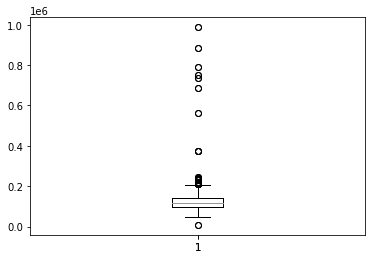

In [13]:
import matplotlib.pyplot as plt

# Create a box plot of the salary_estimate column


#There's a value which is way too higher than the others,
#Let's remove it

# Identify any outliers based on the box plot and remove them using boolean indexing
df = df[df['Salary Estimate'] > 0]
df = df[df['Salary Estimate'] < 1000000]

plt.boxplot(df['Salary Estimate']);

#Values under 1M$ seem legit salaries

EDA

In [14]:
# get summary statistics for numerical columns
print(df.describe())

       Salary Estimate      Rating
count       465.000000  417.000000
mean     130572.043011    3.893285
std       89281.299558    0.524086
min        7917.000000    1.000000
25%       96286.000000    3.700000
50%      114578.000000    3.900000
75%      140000.000000    4.200000
max      988000.000000    5.000000


In [15]:
# check for missing values
print(df.isnull().sum())

#If we have some columns missing too many values, then, they might be not good to build a model

#Ex. seniority can be removed, same for revenue

Job Title            0
Salary Estimate      0
Job Description      0
Rating              48
Company Name         0
Location            12
Size                29
Industry            63
Sector              63
Revenue            169
Job State           14
Job Simplified      69
Seniority          281
dtype: int64


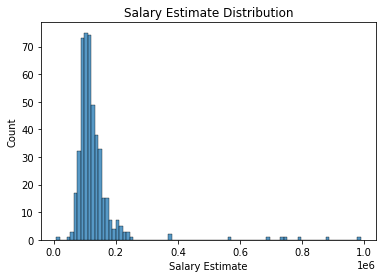

In [17]:
# plot a histogram of the Salary Estimate column
sns.histplot(data=df, x='Salary Estimate')
plt.title('Salary Estimate Distribution')
plt.show()

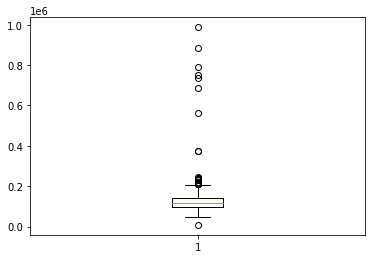

In [19]:
#Plot a boxplot of the Salary Estimate Column

plt.boxplot(df['Salary Estimate']);

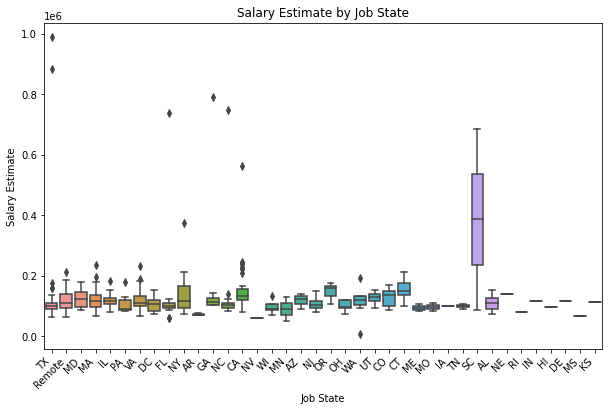

In [24]:
#Let's look for some correlation between the state and the salary

# plot a boxplot of Salary Estimate by Job State
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df, x='Job State', y='Salary Estimate')
plt.title('Salary Estimate by Job State')
plt.xticks(rotation=45, ha='right') # rotate and align the x-axis labels
plt.show()

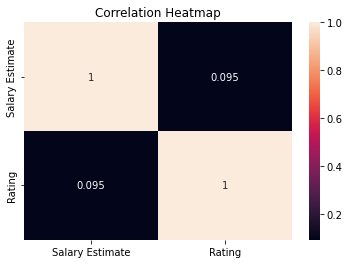

In [21]:
# plot a heatmap of correlations between numerical columns
numerical_cols = ['Salary Estimate', 'Rating']
sns.heatmap(data=df[numerical_cols].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

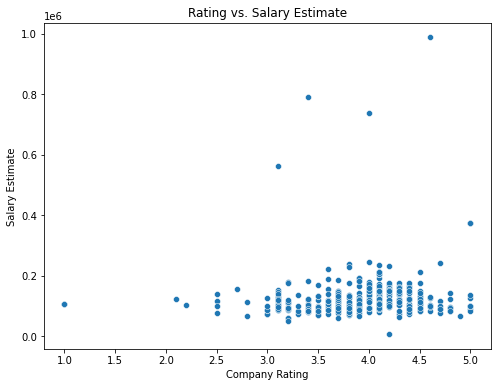

In [29]:
# plot a scatterplot of Salary Estimate vs. Rating

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating', y='Salary Estimate')
plt.xlabel('Company Rating')
plt.ylabel('Salary Estimate')
plt.title('Rating vs. Salary Estimate')
plt.show()


In [28]:
#From the two graphs above, there seems to be very small correlation between rating and salary.
#Rating might not be an interesting variable to use in our model then

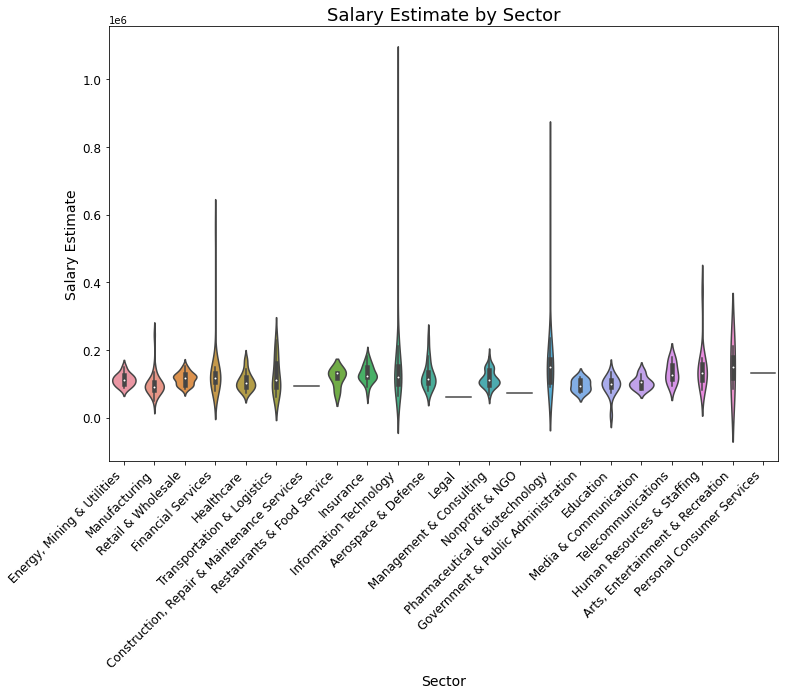

In [34]:
#Let's look at some correlation between sector and salary
# plot a violin plot of Salary Estimate by Sector
plt.figure(figsize=(12, 8))  
sns.violinplot(data=df, x='Sector', y='Salary Estimate')
plt.xticks(rotation=45, ha='right')
plt.title('Salary Estimate by Sector', fontsize=18) 
plt.xlabel('Sector', fontsize=14)  
plt.ylabel('Salary Estimate', fontsize=14)  
plt.tick_params(labelsize=12)  
plt.show()